In [1]:
import pandas as pd
import seaborn as sns
import os
import numpy as np
import csv
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r"C:\\Users\sheej.DESKTOP-SDF1007\OneDrive\Documents\data\Cleaned_Video_Game_Sales.csv")
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76,51,8.0,322,Nintendo,E
1,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82,73,8.3,709,Nintendo,E
2,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80,73,8.0,192,Nintendo,E
3,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89,65,8.5,431,Nintendo,E
4,Wii Play,Wii,2006,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58,41,6.6,129,Nintendo,E


In [3]:
df_grouped = df.groupby('Platform').sum()[['NA_Sales','EU_Sales','JP_Sales','Other_Sales', 'Global_Sales']]
df_grouped

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Platform,,,,,
3DS,40.07,28.70,31.05,6.45,106.32
DC,0.52,0.24,0.38,0.04,1.18
DS,100.08,74.21,77.73,21.04,272.93
GBA,37.55,16.11,13.93,2.33,69.88
GC,52.73,16.45,15.76,2.56,87.44
PS,65.77,47.25,38.04,8.68,159.73
PS2,216.30,129.04,69.06,66.86,481.21
PS3,238.05,218.75,49.36,89.06,595.06
PS4,65.97,97.28,8.52,31.22,202.96


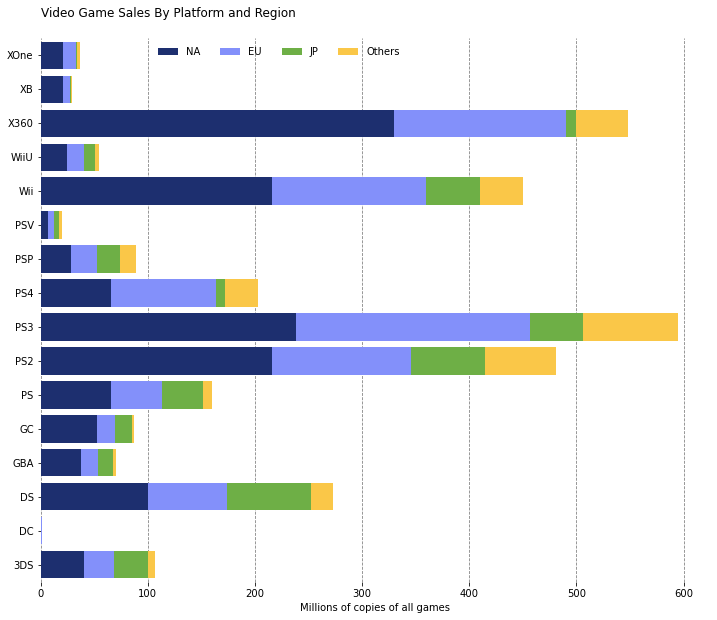

In [4]:
fields = ['NA_Sales','EU_Sales','JP_Sales','Other_Sales']
colors = ['#1D2F6F', '#8390FA', '#6EAF46', '#FAC748']
labels = ['NA', 'EU', 'JP', 'Others']
# figure and axis
fig, ax = plt.subplots(1, figsize=(12, 10))
# plot ars
left = len(df_grouped) * [0]
for idx, name in enumerate(fields):
    plt.barh(df_grouped.index, df_grouped[name], left = left, color=colors[idx])
    left = left + df_grouped[name]
# title, legend, labels
plt.title('Video Game Sales By Platform and Region\n', loc='left')
plt.legend(labels, bbox_to_anchor=([0.55, 1, 0, 0]), ncol=4, frameon=False)
plt.xlabel('Millions of copies of all games')
# remove spines
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
# adjust limits and draw grid lines
plt.ylim(-0.5, ax.get_yticks()[-1] + 0.5)
ax.set_axisbelow(True)
ax.xaxis.grid(color='gray', linestyle='dashed')
plt.show()
fig.savefig('Video_Game_Sales_by_PR.png', dpi=250)